In [3]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import numpy as np

In [4]:
path_file= "c:\\repositories\\projects\\Capstone\\Data\\DEXUSEU.xlsx"

xdf=pd.read_excel(path_file)

In [5]:
xdf = xdf.fillna(method='ffill')


In [6]:
xdf.dtypes

observation_date    datetime64[ns]
DEXUSEU                    float64
dtype: object

In [7]:
path_file2 = "c:\\repositories\\projects\\Capstone\\Data\\IR10010.xlsx"

In [8]:
xdf2=pd.read_excel(path_file2)

In [9]:
xdf2 = xdf2.fillna(method='ffill')

In [10]:
### Eda analysis
## Correlation

xdf1= xdf
xdf1 = xdf1.set_index('observation_date')
xdf2 = xdf2.set_index('observation_date')

## Filter by 

In [11]:
xdf1= xdf
xdf1 = xdf1.set_index('observation_date')
xdf1=xdf1.loc['2018-01-01':'2021-12-31']

In [11]:
xdf2=xdf2.loc['2018-01-01':'2021-12-31']
print(xdf1.columns, xdf2.columns)

Index(['DEXUSEU'], dtype='object') Index(['IR10010'], dtype='object')


In [12]:
#xdf2 = xdf2.set_index('observation_date')
xdf2= xdf2.fillna(method='ffill')

xdf2=xdf2.loc['2018-01-01':'2021-12-31']


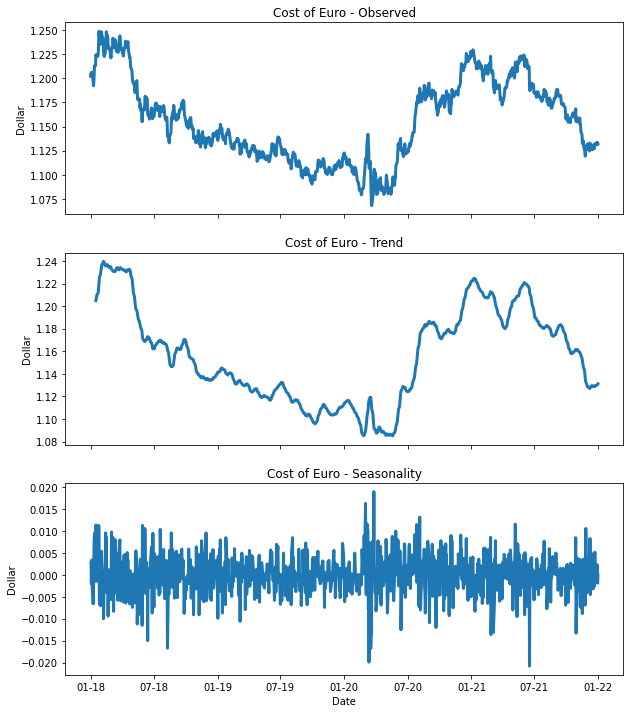

In [14]:
fig, (ax1,ax2,ax3) = plt.subplots(3, figsize=(10, 12), sharex=True)
date_form = DateFormatter("%m-%y")
ax1.xaxis.set_major_formatter(date_form)
ax1.plot(xdf1.index, xdf1['DEXUSEU'], linewidth =3)

# Set title and labels for axes
ax1.set(xlabel="Date",
       ylabel="Dollar",
       title="Cost of Euro - Observed")

ax2.xaxis.set_major_formatter(date_form)

xr1 = xdf1.rolling(12).mean()
ax2.plot(xr1.index, xr1['DEXUSEU'], linewidth =3)

# Set title and labels for axes
ax2.set(xlabel="Date",
       ylabel="Dollar",
       title="Cost of Euro - Trend")


ax3.xaxis.set_major_formatter(date_form)
xs1 = xdf1.diff()
ax3.plot(xs1.index, xs1['DEXUSEU'], linewidth =3)
# Set title and labels for axes
ax3.set(xlabel="Date",
       ylabel="Dollar",
       title="Cost of Euro - Seasonality")

for ax in fig.get_axes():
    ax.label_outer()

plt.savefig('c:\Repositories\Projects\Capstone\static\images\img1.png', bbox_inches='tight')
plt.show()


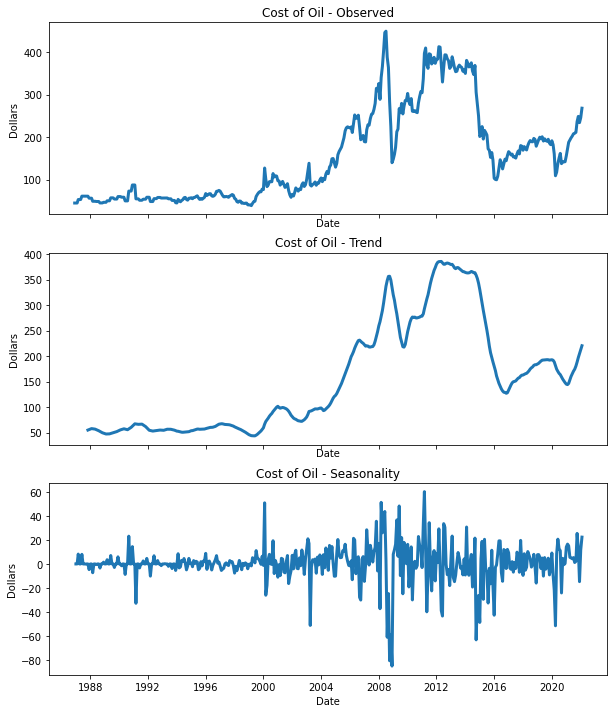

In [15]:
fig, (ax1,ax2,ax3) = plt.subplots(3, figsize=(10, 12), sharex=True)
date_form = DateFormatter("%m-%y")
ax1.xaxis.set_major_formatter(date_form)
ax1.set(xlabel="Date",
       ylabel="Dollars",
       title="Cost of Oil - Observed")

ax1.plot(xdf2.index, xdf2['IR10010'], linewidth =3 )

ax2.xaxis.set_major_formatter(date_form)

xr2 = xdf2.rolling(12).mean()
ax2.plot(xr2.index, xr2['IR10010'], linewidth =3 )
# Set title and labels for axes
ax2.set(xlabel="Date",
       ylabel="Dollars",
       title="Cost of Oil - Trend")

xs2 = xdf2.diff()
ax3.plot(xs2.index, xs2['IR10010'], linewidth =3)
ax3.set(xlabel="Date",
       ylabel="Dollars",
       title="Cost of Oil - Seasonality")


plt.savefig('c:\Repositories\Projects\Capstone\static\images\img2.png', bbox_inches='tight')

plt.show()

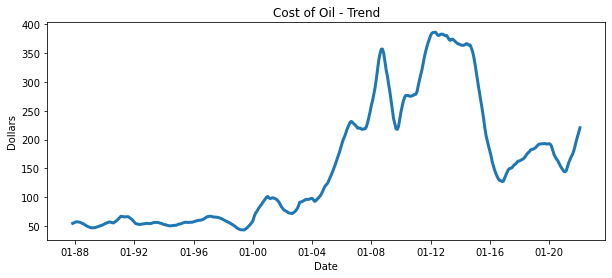

In [16]:
fig, ax = plt.subplots(figsize=(10, 4))
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)

xr2 = xdf2.rolling(12).mean()
ax.plot(xr2.index, xr2['IR10010'], linewidth =3)
# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Dollars",
       title="Cost of Oil - Trend")

plt.show()

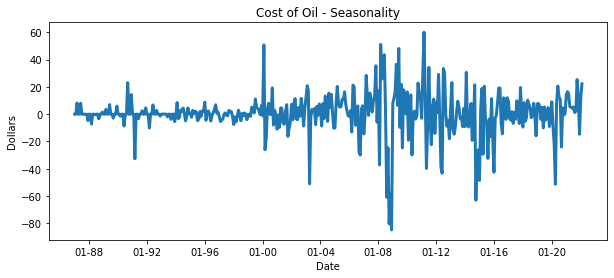

In [17]:
fig, ax = plt.subplots(figsize=(10, 4))
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)

xs2 = xdf2.diff()
ax.plot(xs2.index, xs2['IR10010'], linewidth =3)
ax.set(xlabel="Date",
       ylabel="Dollars",
       title="Cost of Oil - Seasonality")

plt.show()
plt.show()

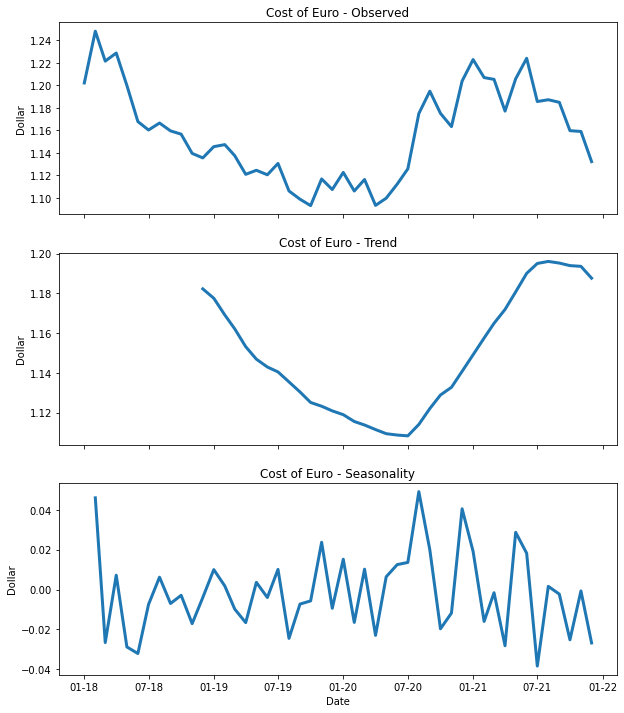

In [19]:
xdf3 = xdf1.resample(rule='M').first()
xdf3=xdf3.set_index(pd.to_datetime(xdf3.index.strftime('%Y-%m-') +'01'))
fig, (ax1,ax2,ax3) = plt.subplots(3, figsize=(10, 12), sharex=True)
date_form = DateFormatter("%m-%y")

ax1.xaxis.set_major_formatter(date_form)
ax1.plot(xdf3.index, xdf3['DEXUSEU'], linewidth =3)

# Set title and labels for axes
ax1.set(xlabel="Date",
       ylabel="Dollar",
       title="Cost of Euro - Observed")

ax2.xaxis.set_major_formatter(date_form)

xr1 = xdf3.rolling(12).mean()
ax2.plot(xr1.index, xr1['DEXUSEU'], linewidth =3)

# Set title and labels for axes
ax2.set(xlabel="Date",
       ylabel="Dollar",
       title="Cost of Euro - Trend")


ax3.xaxis.set_major_formatter(date_form)
xs1 = xdf3.diff()
ax3.plot(xs1.index, xs1['DEXUSEU'], linewidth =3)
# Set title and labels for axes
ax3.set(xlabel="Date",
       ylabel="Dollar",
       title="Cost of Euro - Seasonality")

for ax in fig.get_axes():
    ax.label_outer()

plt.savefig('c:\Repositories\Projects\Capstone\static\images\img1.png', bbox_inches='tight')

plt.show()


In [20]:
# Compute correlation of levelsx

correlation1 = xdf2['IR10010'].corr(xdf3['DEXUSEU'])
print("Correlation of levels: ", correlation1)


# Compute correlation of percent changes
changes1 = xdf3.pct_change()
changes2 = xdf2.pct_change()
correlation2 = changes1['DEXUSEU'].corr(changes2['IR10010'])
print("Correlation of changes: ", correlation2)



Correlation of levels:  0.036869183688369195
Correlation of changes:  0.1651991747732932


In [ ]:
fig, (ax1,ax2) = plt.subplots(2, figsize=(8, 8))
# Set title and labels for axes
ax1.set(xlabel="Euros",
       ylabel="Oil",
       title='Raw Data')

ax2.set(xlabel="Euros",
       ylabel="Oil",
       title='Changes')


ax1.scatter(xdf3['DEXUSEU'], xdf2['IR10010'])
ax2.scatter(changes1['DEXUSEU'], changes2['IR10010'])

for ax in fig.get_axes():
    ax.label_outer()

#plt.show()


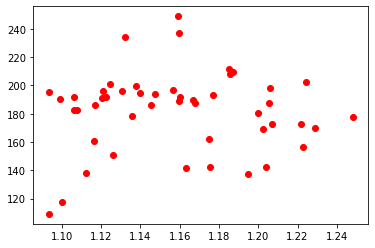

In [219]:
plt.scatter(xdf3['DEXUSEU'], xdf2['IR10010'])
plt.show()


In [236]:
autocorrelation = changes1['DEXUSEU'].autocorr()
print("The monthy autocorrelation is %4.2f" %(autocorrelation))

# Compute the daily change in interest rates 
monthly_diff = changes1['DEXUSEU'].diff()

# Compute and print the autocorrelation of daily changes
autocorrelation_daily = monthly_diff.autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))


The monthy autocorrelation is -0.05
The autocorrelation of daily interest rate changes is -0.48


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


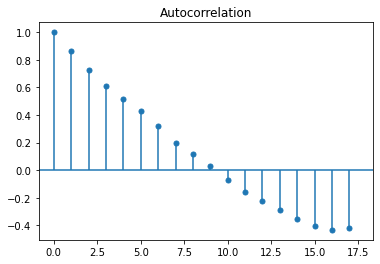

In [23]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Compute the acf array of HRB
acf_array = acf(xdf3['DEXUSEU'])

# Plot the acf function
plot_acf(xdf3['DEXUSEU'], alpha=1)
plt.show()

The autocorrelation monthly is 0.88
The approximate confidence interval is +/- 0.28


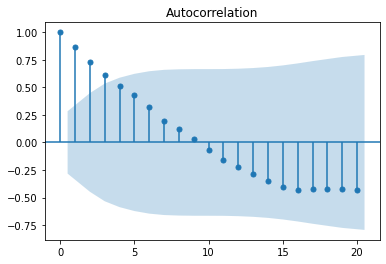

In [27]:
# Import the plot_acf module from statsmodels and sqrt from math
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt

# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = xdf3['DEXUSEU'].autocorr()
print("The autocorrelation monthly is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(xdf3)

# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(xdf3['DEXUSEU'], alpha=0.05, lags=20)
plt.show()

The mean is 1.158 and the standard deviation is 0.041


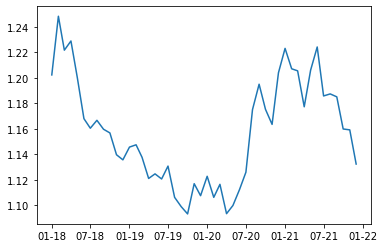

In [28]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Simulate white noise returns
returns = xdf3['DEXUSEU']

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(1,1)
# Plot returns series\
date_form = DateFormatter("%m-%y")
axes.xaxis.set_major_formatter(date_form)
axes.plot(returns)

plt.savefig('c:\Repositories\Projects\Capstone\static\images\img_stat.png', bbox_inches='tight')

plt.show()



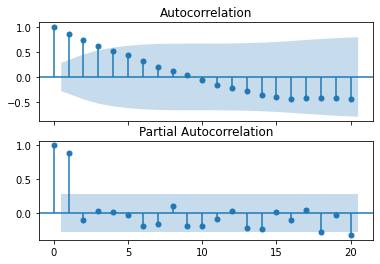

In [29]:
fig, axes = plt.subplots(2,1)
plot_acf(returns, lags=20,ax=axes[0])
plot_pacf(returns, lags=20,ax=axes[1])

for ax in fig.get_axes():
    ax.label_outer()
plt.savefig('c:\Repositories\Projects\Capstone\static\images\img_corr.png', bbox_inches='tight')
plt.show()

In [40]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Run the ADF test on the price series and print out the results
results = adfuller(xdf3['DEXUSEU'])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(-1.8030926189458665, 0.3789273787362394, 0, 47, {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}, -185.17866943759117)
The p-value of the test on prices is: 0.3789273787362394


In [ ]:
# Create a DataFrame of AMZN returns
AMZN_ret = AMZN.pct_change()

# Eliminate the NaN in the first row of returns
AMZN_ret =  AMZN_ret.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(AMZN_ret['Adj Close'])
print('The p-value of the test on returns is: ' + str(results[1]))

0       NaN
1       NaN
2       NaN
3       NaN
4    0.0073
5    0.0063
6   -0.0022
7   -0.0066
8   -0.0072
9   -0.0032
Name: DEXUSEU, dtype: float64


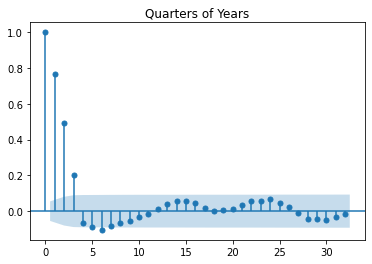

In [30]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Seasonally adjust quarterly earnings
results = xdf['DEXUSEU'].diff(4)

# Print the first 10 rows of the seasonally adjusted series
print(results.head(10))

# Drop the NaN data in the first four rows
results = results.dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(results, title= 'Quarters of Years')
plt.savefig('c:\Repositories\Projects\Capstone\static\images\img_qtr.png', bbox_inches='tight')

plt.show()

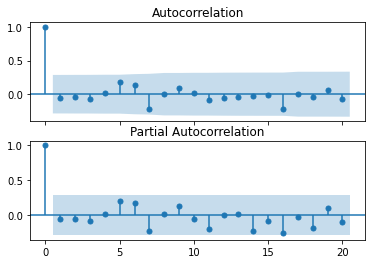

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Take first difference of the temperature Series
chg_temp = xdf3['DEXUSEU'].diff()
chg_temp = chg_temp.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])
for ax in fig.get_axes():
    ax.label_outer()
plt.show()

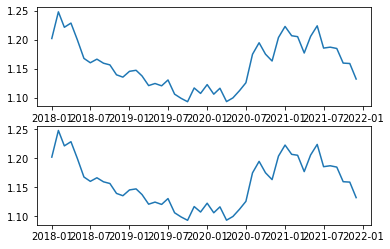

In [45]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = xdf3['DEXUSEU']
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
date_form = DateFormatter("%m-%y")
for ax in fig.get_axes():
    ax.label_outer()
plt.plot(simulated_data_1)
plt.show()

In [31]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an AR(1) model to the first simulated data
mod = ARMA(xdf3, order=(5,0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res.params)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

                              ARMA Model Results                              
Dep. Variable:                DEXUSEU   No. Observations:                   48
Model:                     ARMA(5, 0)   Log Likelihood                 120.388
Method:                       css-mle   S.D. of innovations              0.019
Date:                Thu, 28 Apr 2022   AIC                           -226.776
Time:                        19:53:59   BIC                           -213.678
Sample:                    01-01-2018   HQIC                          -221.826
                         - 12-01-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1586      0.019     61.178      0.000       1.121       1.196
ar.L1.DEXUSEU     0.8960      0.151      5.915      0.000       0.599       1.193
ar.L2.DEXUSEU     0.0106      0.217     

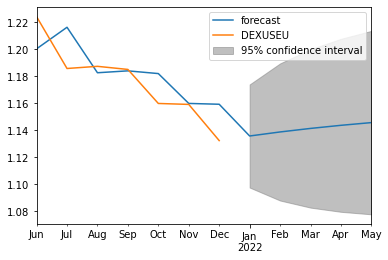

In [50]:
res.plot_predict(start='2021-06-01', end='2022-05-01')
plt.savefig('c:\Repositories\Projects\Capstone\static\images\model1.png', bbox_inches='tight')
plt.show()

In [267]:
# Fit an AR(1) model to the first simulated data
mod2 = ARMA(xdf3, order=(2,0))
res2 = mod.fit()

# Print out summary information on the fit
print(res2.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res2.params)

                              ARMA Model Results                              
Dep. Variable:                DEXUSEU   No. Observations:                   48
Model:                     ARMA(1, 0)   Log Likelihood                 120.212
Method:                       css-mle   S.D. of innovations              0.019
Date:                Wed, 13 Apr 2022   AIC                           -234.425
Time:                        09:13:47   BIC                           -228.811
Sample:                    01-01-2018   HQIC                          -232.303
                         - 12-01-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1600      0.020     57.674      0.000       1.121       1.199
ar.L1.DEXUSEU     0.8772      0.065     13.591      0.000       0.751       1.004
                                    Root

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [48]:
res2.plot_predict(start='2021-06-01', end='2022-05-01')
plt.savefig('c:\Repositories\Projects\Capstone\static\images\img_qtr.png', bbox_inches='tight')
plt.show()

NameError: name 'res2' is not defined

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

                              ARMA Model Results                              
Dep. Variable:                DEXUSEU   No. Observations:                   48
Model:                     ARMA(6, 0)   Log Likelihood                 122.012
Method:                       css-mle   S.D. of innovations              0.019
Date:                Thu, 14 Apr 2022   AIC                           -228.024
Time:                        16:36:31   BIC                           -213.054
Sample:                    01-01-2018   HQIC                          -222.367
                         - 12-01-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1562      0.016     73.059      0.000       1.125       1.187
ar.L1.DEXUSEU     0.8554      0.147      5.834      0.000       0.568       1.143
ar.L2.DEXUSEU     0.0579      0.211     

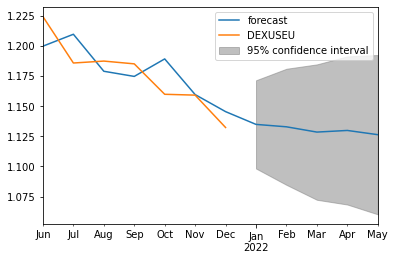

In [62]:
# Fit an AR(1) model to the first simulated data
mod3 = ARMA(xdf3, order=(5,0))
res3 = mod.fit()

# Print out summary information on the fit
print(res3.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res3.params)
res3.plot_predict(start='2021-06-01', end='2022-05-01')
plt.savefig('c:\Repositories\Projects\Capstone\static\images\model2.png', bbox_inches='tight')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

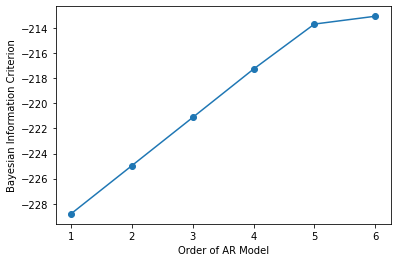

In [53]:

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
AIC = np.zeros(7)
for p in range(7):
    mod = ARMA(xdf3, order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    AIC[p] = res.aic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()


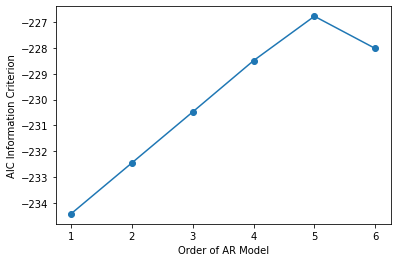

In [59]:

plt.plot(range(1,7), AIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('AIC Information Criterion')
plt.savefig('c:\Repositories\Projects\Capstone\static\images\mod_stat1.png', bbox_inches='tight')


plt.show()

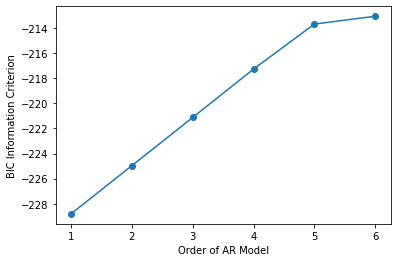

In [60]:
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('BIC Information Criterion')
plt.savefig('c:\Repositories\Projects\Capstone\static\images\mod_stat2.png', bbox_inches='tight')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

                              ARMA Model Results                              
Dep. Variable:                DEXUSEU   No. Observations:                   48
Model:                     ARMA(6, 0)   Log Likelihood                 122.012
Method:                       css-mle   S.D. of innovations              0.019
Date:                Thu, 14 Apr 2022   AIC                           -228.024
Time:                        16:30:03   BIC                           -213.054
Sample:                    01-01-2018   HQIC                          -222.367
                         - 12-01-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1562      0.016     73.059      0.000       1.125       1.187
ar.L1.DEXUSEU     0.8554      0.147      5.834      0.000       0.568       1.143
ar.L2.DEXUSEU     0.0579      0.211     

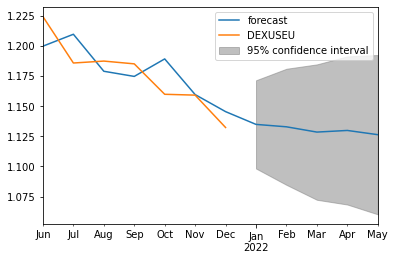

In [55]:
# Fit an AR(1) model to the first simulated data
mod3 = ARMA(xdf3, order=(5,0))
res3 = mod.fit()

# Print out summary information on the fit
print(res3.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res3.params)
res3.plot_predict(start='2021-06-01', end='2022-05-01')
plt.show()

In [15]:
path_file= "c:\\repositories\\projects\\Capstone\\Data\\data1.xlsx"

xeuros=pd.read_excel(path_file)

In [17]:
xeuros = xeuros.fillna(method='ffill')


In [22]:
start_date=min(xeuros['date'])
end_date = max(xeuros['date']) 
print(start_date, end_date)

2017-02-21 00:00:00 2022-02-02 00:00:00


In [27]:
xdates = pd.date_range(start= start_date , end= end_date).to_list()
xdata_dates = xeuros['date'].to_list()
result = list(set(xdates) - set(xdata_dates))


In [38]:
xnewdata = pd.DataFrame( { 'date':result, 'value':np.NaN})
xfinal = pd.concat([xnewdata, xeuros]).sort_values (by='date').fillna(method='ffill')
xfinal 

,date,value
0,2017-02-21,1.0551
1,2017-02-22,1.0555
2,2017-02-23,1.0586
3,2017-02-24,1.0580
62,2017-02-25,1.0580
...,...,...
306,2022-01-29,1.1160
492,2022-01-30,1.1160
1289,2022-01-31,1.1212
1290,2022-02-01,1.1239


In [46]:
print( min(xfinal['date']), max(xfinal['date']))

2017-02-21 00:00:00 2022-02-02 00:00:00


In [41]:
xfinal.to_csv('c:\\RepoVS\\TestPython\\static\\data\\euros.csv',index=False)

In [1]:
def generate_file(file, name, start, finish):
    
    # Original Information 
    
    xdata=pd.read_excel(file)
    xdata = xdata.fillna(method='ffill')
    xdata.set_index('date',inplace=True)

    
    xdata=xdata.loc[start: finish]

    start_date=min(xdata.index)
    end_date = max(xdata.index) 
    
    xdates = pd.date_range(start= start_date , end= end_date).to_list()
    xdata_dates = list(xdata.index)
    
    result = list(set(xdates) - set(xdata_dates))

    xnewdata = pd.DataFrame( { 'date':result, 'value':np.NaN})
    xnewdata.set_index('date',inplace=True)
    xfinal = pd.concat([xnewdata, xdata]).sort_index().fillna(method='ffill')
    
    xfinal.to_csv(name)
    
    xfinal_rolling_mean = xfinal.rolling(12).mean().dropna() # rolling mean
    xfinal_diff = xfinal.diff().dropna()   # diff 
    xfinal_pct = xfinal.pct_change().dropna()   #pct
    xfinal_diff4 = xfinal.diff(4).dropna()   # diff
    
    xnorm = preprocessing.normalize([np.array(xfinal['value'])])
    xfinal_norm = pd.DataFrame( { 'date':np.array(xfinal.index) , 'value': xnorm[0]  }  ) 
    xfinal_norm.set_index('date', inplace=True)
    
    
    xtotal  = xfinal.merge(xfinal_rolling_mean)
    xtotal  = xtotal.merge(xfinal_diff)
    xtotal  = xtotal.merge(xfinal_pct)
    xtotal  = xtotal.merge(xfinal_norm)
    
    
    # Weeklky Information 
    
    xm=xfinal.resample('M').mean()
    xm_pct = xm.pct_change()
    
    xm.to_csv(name.replace('.csv','_mpct.csv') )
    xm_pct.to_csv(name.replace('.csv','_mpct.csv') )
    
    # Montly Information 
    
    xm=xfinal.resample('W').mean()
    xm_pct = xm.pct_change()
    
    xm.to_csv(name.replace('.csv','_w.csv') )
    xm_pct.to_csv(name.replace('.csv','_wpct.csv') )
    
    ## Final 
    
    xfinal_rolling_mean.to_csv(name.replace('.csv','_mean.csv') )
    xfinal_diff.to_csv(name.replace('.csv','_diff.csv') )    
    xfinal_pct.to_csv(name.replace('.csv','_pct.csv') )
    xfinal_diff4.to_csv(name.replace('.csv','_diff4.csv') ) 
    xfinal_norm.to_csv(name.replace('.csv','_norm.csv') )
    xtotal.to_csv(name.replace('.csv','_total.csv') )
    
    

In [10]:
xpath = "c:\\repositories\\projects\\Capstone\\Data\\data1.xlsx"
xname = 'c:\\RepoVS\\TestPython\\static\\data\\euros.csv'
start = '2018-01-01'
finish = '2022-01-31'
generate_file(xpath, xname, start, finish)

xpath = "c:\\repositories\\projects\\Capstone\\Data\\data2.xlsx"
xname = 'c:\\RepoVS\\TestPython\\static\\data\\oil.csv'
start = '2018-01-01'
finish = '2022-01-31'
#generate_file(xpath, xname, start, finish)



In [89]:
def create_corr_plot(series, plot_pacf=False):
    corr_array = pacf(series.dropna(), alpha=0.05) if plot_pacf else acf(series.dropna(), alpha=0.05)
    lower_y = corr_array[1][:,0] - corr_array[0]
    upper_y = corr_array[1][:,1] - corr_array[0]

    fig = go.Figure()
    [fig.add_scatter(x=(x,x), y=(0,corr_array[0][x]), mode='lines',line_color='#3f3f3f') 
     for x in range(len(corr_array[0]))]
    
    fig.add_scatter(x=np.arange(len(corr_array[0])), y=corr_array[0], mode='markers', marker_color='#1f77b4',
                   marker_size=12)
    
    fig.add_scatter(x=np.arange(len(corr_array[0])), y=upper_y, mode='lines', line_color='rgba(255,255,255,0)')
    
    
    fig.add_scatter(x=np.arange(len(corr_array[0])), y=lower_y, mode='lines',fillcolor='rgba(32, 146, 230,0.3)',
            fill='tonexty', line_color='rgba(255,255,255,0)')
    
    fig.update_traces(showlegend=False)
    fig.update_xaxes(range=[-1,42])
    fig.update_yaxes(zerolinecolor='#000000')
    
    title='Partial Autocorrelation (PACF)' if plot_pacf else 'Autocorrelation (ACF)'
    fig.update_layout(title=title)
    fig.show()

In [7]:
from sklearn import preprocessing

In [8]:
from statsmodels.tsa.stattools import pacf,acf
from statsmodels.graphics.tsaplots import plot_acf, plof_pacf
from math import sqrt


# df['sum'] is my time series where i want the pacf of.

xxdf = pd.read_csv('c:\\RepoVS\\TestPython\\static\\data\\euros.csv')
df_pacf = pacf(xxdf['value'], nlags=10, alpha=0.05)
df_acf = acf(xxdf['value'], nlags=10, alpha= 0.05)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [159]:
y=df_acf[1]
y0=df_acf[0]
y_lower= [ y[i][0] for i in range(len(y))] - y0
y_upper= [ y[i][1] for i in range(len(y))] - y0

print(y0)
print(y_lower)
print(y_upper)

[1.         0.99472698 0.9888362  0.98295288 0.97708612 0.97110879
 0.96523929 0.95992583 0.95466651 0.9497964  0.94483892]
[ 0.         -0.04609448 -0.07955756 -0.10239364 -0.12078996 -0.13655441
 -0.15051416 -0.16313683 -0.17472627 -0.18547809 -0.19553916]
[0.         0.04609448 0.07955756 0.10239364 0.12078996 0.13655441
 0.15051416 0.16313683 0.17472627 0.18547809 0.19553916]


The autocorrelation monthly is 1.00
The approximate confidence interval is +/- 0.05


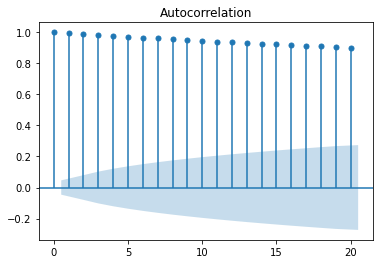

In [156]:

# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = xxdf['value'].autocorr()
print("The autocorrelation monthly is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(xxdf)

# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(xxdf['value'], alpha=0.05, lags=20)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                 1492
Model:                     ARMA(1, 0)   Log Likelihood                6239.245
Method:                       css-mle   S.D. of innovations              0.004
Date:                Tue, 26 Apr 2022   AIC                         -12472.491
Time:                        02:11:18   BIC                         -12456.567
Sample:                    01-01-2018   HQIC                        -12466.557
                         - 01-31-2022                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1572      0.021     54.475      0.000       1.116       1.199
ar.L1.value     0.9961      0.002    474.854      0.000       0.992       1.000
                                    Roots       

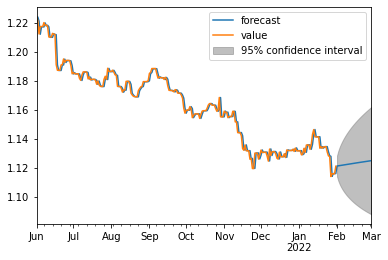

In [76]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA, ARMAResults


xfig = 'c:\\RepoVS\\TestPython\\static\\images\\test_model.png'
xdf = pd.read_csv('c:\\RepoVS\\TestPython\\static\\data\\euros.csv')
xdf.set_index('date',inplace=True)

# Fit an AR(1) model to the first simulated data
mod = ARMA(xdf, order=(1,0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res.params)
res.plot_predict(start='2021-06-01', end='2022-03-01')
plt.savefig(xfig, bbox_inches='tight')
plt.show()

res.save('model.pkl')

loaded_model = ARMAResults.load('model.pkl')



In [92]:
errors = mod.geterrors(np.array(xdf['value']))
mean = np.mean(errors)
predict= mod.predict(xdf, start='2021-06-01', end='2022-03-01' )
predict

array([  1.222926  ,   1.2285895 ,   1.2252155 ,   1.21425   ,
         1.2203955 ,   1.2203955 ,   1.2203955 ,   1.223649  ,
         1.221239  ,   1.221721  ,   1.2203955 ,   1.2117195 ,
         1.2117195 ,   1.2117195 ,   1.214732  ,   1.214009  ,
         1.2138885 ,   1.1888245 ,   1.184125  ,   1.184125  ,
         1.184125  ,   1.1885835 ,   1.188704  ,   1.193524  ,
         1.1907525 ,   1.192319  ,   1.192319  ,   1.192319  ,
         1.192078  ,   1.1881015 ,   1.181233  ,   1.1823175 ,
         1.181233  ,   1.181233  ,   1.181233  ,   1.181233  ,
         1.177377  ,   1.1758105 ,   1.180269  ,   1.1827995 ,
         1.1827995 ,   1.1827995 ,   1.182438  ,   1.1770155 ,
         1.178582  ,   1.176172  ,   1.176654  ,   1.176654  ,
         1.176654  ,   1.175931  ,   1.172557  ,   1.1753285 ,
         1.1719545 ,   1.1707495 ,   1.1707495 ,   1.1707495 ,
         1.176654  ,   1.1791845 ,   1.1765335 ,   1.185812  ,
         1.183161  ,   1.183161  ,   1.183161  ,   1.18

<class 'statsmodels.tsa.arima_model.ARMAResultsWrapper'>


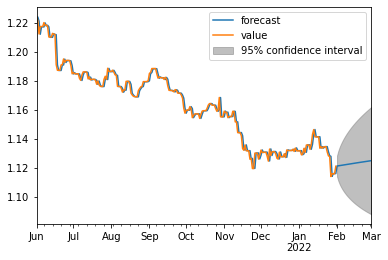

In [74]:
print(type((loaded_model)))

loaded_model.plot_predict(start='2021-06-01', end='2022-03-01')


plt.show()





C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

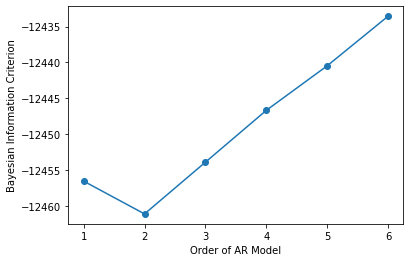

In [93]:
# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(10)
AIC = np.zeros(10)
for p in range(10):
    mod = ARMA(xdf, order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    AIC[p] = res.aic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

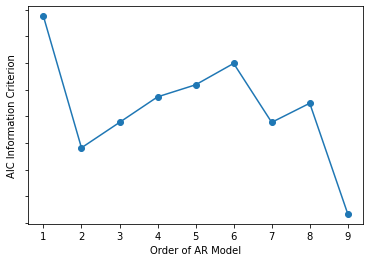

In [102]:

plt.plot(range(1,10), AIC[1:10], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('AIC Information Criterion')
plt.gca().axes.yaxis.set_ticklabels([])
xfig = 'c:\\RepoVS\\TestPython\\static\\images\\aic_model.png'

plt.savefig(xfig, bbox_inches='tight')


plt.show()


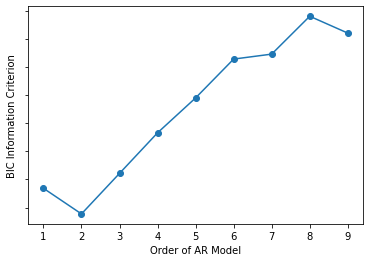

In [103]:
plt.plot(range(1,10), BIC[1:10], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('BIC Information Criterion')
plt.gca().axes.yaxis.set_ticklabels([])

xfig = 'c:\\RepoVS\\TestPython\\static\\images\\bic_model.png'

plt.savefig(xfig, bbox_inches='tight')



plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                 1492
Model:                     ARMA(8, 0)   Log Likelihood                6249.510
Method:                       css-mle   S.D. of innovations              0.004
Date:                Tue, 26 Apr 2022   AIC                         -12479.020
Time:                        02:25:03   BIC                         -12425.941
Sample:                    01-01-2018   HQIC                        -12459.241
                         - 01-31-2022                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1572      0.020     56.864      0.000       1.117       1.197
ar.L1.value     1.0851      0.026     41.913      0.000       1.034       1.136
ar.L2.value    -0.0788      0.038     -2.065    

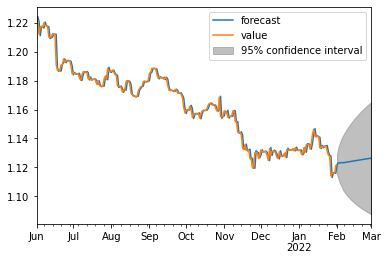

In [99]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA, ARMAResults


xfig = 'c:\\RepoVS\\TestPython\\static\\images\\best_model.png'
xdf = pd.read_csv('c:\\RepoVS\\TestPython\\static\\data\\euros.csv')
xdf.set_index('date',inplace=True)

# Fit an AR(1) model to the first simulated data
mod = ARMA(xdf, order=(8,0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res.params)
res.plot_predict(start='2021-06-01', end='2022-03-01')
plt.savefig(xfig, bbox_inches='tight')
plt.show()

res.save('model.pkl')

loaded_model = ARMAResults.load('model.pkl')



In [104]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Run the ADF test on the price series and print out the results
results = adfuller(xdf['value'])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(-1.6877748893318898, 0.437421973388853, 11, 1480, {'1%': -3.434776133889219, '5%': -2.8634948507368767, '10%': -2.5678107418736302}, -12311.74843211013)
The p-value of the test on prices is: 0.437421973388853
